In [3]:
import numpy as np
import pandas as pd

In [1]:
with open(r'D:\INF554\Projet\abstracts\abstracts.txt ', encoding="utf-8") as f:
    lines = f.readlines()

In [2]:
len(lines)

624181

In [4]:
dico = {} # long
count = {}
cpt = 0
nb_lines = 30
for i in range(nb_lines):
    
    l = lines[i].split("----")
    key = int(l[0])
    count[key] = int(l[1].split("{")[1].split(":")[1].split(",")[0])
    l = l[1].split("{")[2].replace('\n','').replace('"','').replace('[','').replace('}','').split("],")
    for i in range(len(l)):
        e = l[i].split(":")
        if len(e) > 1:
            word, numbers = e[0], e[1]
        l[i] = [word] + numbers.replace(' ', '').split(",")
    dico[key] = l
for key in dico.keys():
    for ie, e in enumerate(dico[key]):
        for i in range(1,len(e)):
            try:
                e[i] = int(e[i])
            except ValueError:
                dico[key].pop(ie)
for key in dico.keys():
    array = np.zeros(count[key], dtype=object)
    for e in dico[key]:
        for i in range(1,len(e)):
            array[e[i]] = e[0]
        
    text = ""
    for word in array:
        if word != 0:
            text += word + " "
    dico[key] = text

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
dico

{3603: [['In', 0],
  ['this', 1],
  ['paper,', 2],
  ['we', 3, 98],
  ['describe', 4],
  ['a', 5, 16, 41, 58, 62, 67, 74, 108],
  ['new', 6, 17],
  ['bitmap', 7, 42, 54, 69, 76],
  ['indexing', 8, 43],
  ['technique', 9],
  ['to', 10, 73],
  ['cluster', 11],
  ['XML', 12, 14, 34, 63],
  ['documents.', 13],
  ['is', 15, 71],
  ['standard', 18, 89],
  ['for', 19, 60],
  ['exchanging', 20],
  ['and', 21, 38, 49, 56, 91, 104, 115],
  ['representing', 22],
  ['information', 23],
  ['on', 24, 95, 107],
  ['the', 25, 47, 85, 101, 117],
  ['Internet.', 26],
  ['Documents', 27],
  ['can', 28, 111],
  ['be', 29, 112],
  ['hierarchically', 30],
  ['represented', 31, 37],
  ['by', 32],
  ['XML-elements.', 33],
  ['documents', 35],
  ['are', 36],
  ['indexed', 39],
  ['using', 40],
  ['technique.', 44],
  ['We', 45, 80],
  ['define', 46, 81, 100],
  ['similarity', 48],
  ['popularity', 50],
  ['operations', 51, 106],
  ['available', 52],
  ['in', 53, 84],
  ['indexes', 55],
  ['propose', 57],
  ['m

**Cleaning Data**

**Reproduire le texte**

In [139]:
a = dico[3603]
length = count[3603]
sentence = ['' for i in range(length)]
for i in a:
    indx = i[1:]
    for j in indx:
        sentence[int(j)] = i[0]
   

In [162]:
indice = list(dico.keys())
sentences = []
for ind in indice:
    a = dico[ind]
    length = count[ind]
    sentence = ['' for i in range(length)]
    for i in a:
        indx = i[1:]
        for j in indx:
            if type((j)) == int :
                sentence[(j)] = i[0]
    sentences = sentences + [sentence]

IndexError: list assignment index out of range

In [213]:
print(sentences)

[['In', 'this', 'paper,', 'we', 'describe', 'a', 'new', 'bitmap', 'indexing', 'technique', 'to', 'cluster', 'XML', 'documents.', 'XML', 'is', 'a', 'new', 'standard', 'for', 'exchanging', 'and', 'representing', 'information', 'on', 'the', 'Internet.', 'Documents', 'can', 'be', 'hierarchically', 'represented', 'by', 'XML-elements.', 'XML', 'documents', 'are', 'represented', 'and', 'indexed', 'using', 'a', 'bitmap', 'indexing', 'technique.', 'We', 'define', 'the', 'similarity', 'and', 'popularity', 'operations', 'available', 'in', 'bitmap', 'indexes', 'and', 'propose', 'a', 'method', 'for', 'partitioning', 'a', 'XML', 'document', 'set.', 'Furthermore,', 'a', '2-dimensional', 'bitmap', 'index', 'is', 'extended', 'to', 'a', '3dimensional', 'bitmap', 'index,', 'called', 'BitCube.', 'We', 'define', 'statistical', 'measurements', 'in', 'the', '', '', 'mode,', 'standard', 'derivation,', 'and', 'correlation', 'coefficient.', 'Based', 'on', 'these', 'measurements,', 'we', 'also', 'define', 'the',

**nettoyage avt word2vec** 

In [177]:
!pip install gensim==3.8.1

In [178]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [179]:
model = Word2Vec(sentences, min_count=1)

In [185]:
print(model)

Word2Vec(vocab=32180, vector_size=100, alpha=0.025)


In [191]:
words = list(model.wv.index_to_key)
print(words)

['the', 'of', 'and', 'a', 'to', '', 'in', 'is', 'for', 'that', 'The', 'on', 'are', 'with', 'as', 'an', 'this', 'we', 'be', 'by', 'In', 'which', 'We', 'data', 'from', 'This', 'can', 'system', 'paper', '.', 'has', 'have', 'or', 'based', 'it', 'using', 'used', 'such', 'information', 'approach', 'use', 'our', 'model', 'these', 'new', 'their', 'at', 'been', 'not', 'different', 'also', 'systems', 'more', 'between', 'results', 'present', 'its', 'design', 'A', 'into', 'software', 'two', 'user', 'method', 'one', 'analysis', 'other', 'how', 'each', 'set', 'performance', 'research', 'show', 'process', 'will', 'language', 'provide', 'was', 'number', 'proposed', 'some', 'development', 'may', 'paper,', 'problem', 'both', 'network', 'application', 'It', 'applications', 'propose', 'knowledge', 'order', 'work', 'all', 'support', 'time', 'but', 'well', 'most', 'they', 'through', 'over', 'techniques', 'Web', 'many', 'first', 'algorithm', 'Our', 'distributed', 'framework', 'large', 'developed', 'services'

In [197]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

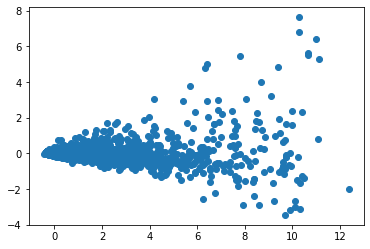

In [199]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

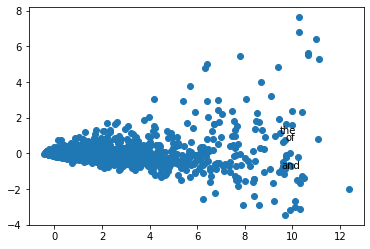

In [208]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words[:3]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    cpt = cpt + 1
pyplot.show()